In [ ]:
'''
Documentation:
Topic: To train a Logistic regression model to predict the charges is there or not for insurance company from given features.
Dataset: insurance.csv
Methodology:
Part 1: 
Read and parse the initial dataset
Load and check the data
Display the dataset with feature information
Part 2: 
Create Logistic regression model
Part 3:
Train and evaluate a Logistic regression model
Visualization 3: Predicted vs. actual
Visualization 4: Training error
'''

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
df=pd.read_csv('insurance.csv') #Reads the csv file at the specified location
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      30 non-null     int64
 1   charges  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


,age,charges
0,18,0
1,28,0
2,33,1
3,32,0
4,31,0


In [2]:
X=df.drop('charges',axis=1)
y=df.charges
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=60)
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [3]:
print(metrics.classification_report(y_test,y_pred))

#calculate precision,recall,accuracy from the metrics module
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#prints the confusion matrix(numpy array 2x2)[row,column]
print('\nConfusion matrix:')
confusion = metrics.confusion_matrix(y_test,y_pred)
print(confusion)
print('\nAccuracy Score on Confusion Matrix:',metrics.accuracy_score(y_test,y_pred)) 
print('Error Score on Confusion Matrix:',1-metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Precision: 1.0
Recall: 1.0
Accuracy: 1.0

Confusion matrix:
[[5 0]
 [0 4]]

Accuracy Score on Confusion Matrix: 1.0
Error Score on Confusion Matrix: 0.0


Text(0, 0.5, 'Y')

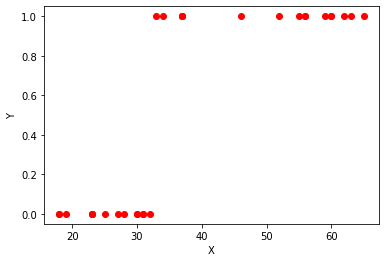

In [4]:
plt.scatter(X, y, color='red')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y - charges')

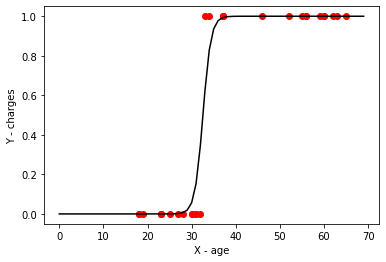

In [5]:
#Visualizing the Logistic Regression Curve
Xs = [i for i in range(70)]
Ys = [clf.predict_proba([[value]])[0][1] for value in range(70)]
plt.scatter(X, y, color='red')
plt.plot(Xs, Ys, color='black')
plt.xlabel('X - age')
plt.ylabel('Y - charges')

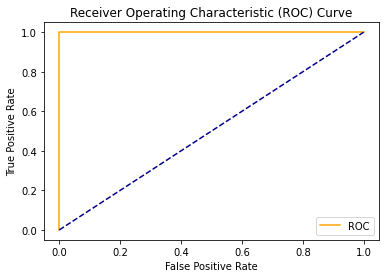

In [6]:
#ROC Curve - The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.
#It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’.
probs = clf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = metrics.roc_curve(y_test, probs) 
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()